# Run HOMER makeTagDirectory of PRO-cap and RNA-seq data

The code is from the HOMER documentation: 

[HOMER: csRNA-seq Analysis Tutorial](http://homer.ucsd.edu/homer/ngs/csRNAseq/index.html)

In [2]:
%%bash
module load perl
module load gcc
export PATH=/data/reddylab/software/homer/bin/:$PATH
makeTagDirectory


	Usage: makeTagDirectory <directory> <alignment file 1> [file 2] ... [options]

	Creates a platform-independent 'tag directory' for later analysis.
	Currently BED, eland, bowtie, and sam files are accepted. The program will try to
	automatically detect the alignment format if not specified.  Program will also
	unzip *.gz, *.bz2, and *.zip files and convert *.bam to sam files on the fly
	Existing tag directories can be added or combined to make a new one using -d/-t
	If more than one format is needed and the program cannot auto-detect it properly,
	make separate tag directories by running the program separately, then combine them.
	To perform QC/manipulations on an existing tag directory, add "-update"

	Options:
		-fragLength <# | given | pe> (Set estimated fragment length or use PE length - given: use read lengths)
			By default treats the sample as a single read ChIP-Seq experiment
		-format <X> where X can be: (with column specifications underneath)
			bed - BED format files:
				(

## HOMER makeTagDirectory of single sample (Option: genome hg38)

In [1]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_t00_hg38.txt \
    <<'EOF'
#!/bin/bash

### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_CAP=/data/reddylab/Kuei/Dex_ProCap
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads

### PRO-cap
FP_BAM_CAP_T00=$FD_CAP/new_files/A549_control_alignments/A549_untreated_merged.bam
FP_BAM_CAP_T15=$FD_CAP/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
FP_BAM_CAP_T60=$FD_CAP/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam

### make Tag dir for PRO-cap (control)
FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer
FD_TAG=$FD_OUT/tags/procap_t00_hg38
FP_BAM=$FP_BAM_CAP_T00
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC

EOF

Submitted batch job 24611910


### Quality Control Checks

In [2]:
import numpy  as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
FD_TAG="/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/tags/procap_t00_hg38"

In [4]:
fdiry = FD_TAG
fname = "tagCountDistribution.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head()

,"Tags per tag position (Median = 0, tags per genomic bp = 0.003)",Fraction of Positions
0,0,0.845399
1,1,0.125846
2,2,0.016180
3,3,0.005331
4,4,0.002493


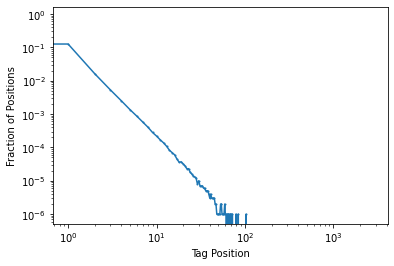

In [5]:
x=dat['Tags per tag position (Median = 0, tags per genomic bp = 0.003)']
y=dat['Fraction of Positions']

plt.plot(x, y, '-o', markersize=1)
plt.xlabel("Tag Position")
plt.ylabel("Fraction of Positions")
plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
fdiry = FD_TAG
fname = "tagLengthDistribution.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head()

,Tag Length (Average tag length = 61.291551),Fraction of Tags
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000118
4,4,0.000088


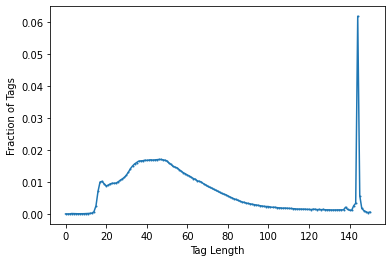

In [7]:
x=dat['Tag Length (Average tag length = 61.291551)']
y=dat['Fraction of Tags']

plt.plot(x, y, '-o', markersize=1)
plt.xlabel("Tag Length")
plt.ylabel("Fraction of Tags")
plt.show()

In [8]:
fdiry = FD_TAG
fname = "tagFreqUniq.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head()

,Offset,A,C,G,T,A/T,C/G,A/G,C/T,AA,...,GA,GC,GG,GT,TA,TC,TG,TT,N,NN
0,-50,0.195888,0.305542,0.305853,0.192717,0.157873,0.381803,0.281499,0.277863,0.049858,...,0.057133,0.098845,0.105627,0.044249,0.027578,0.057619,0.059657,0.047864,13797127.0,13797105.0
1,-49,0.195351,0.305991,0.306543,0.192114,0.157543,0.382477,0.281228,0.277252,0.049264,...,0.057143,0.098949,0.106061,0.044391,0.027606,0.057014,0.059738,0.047758,13797123.0,13797104.0
2,-48,0.194626,0.304944,0.307455,0.192975,0.157195,0.382912,0.281340,0.277557,0.049341,...,0.056985,0.099547,0.106359,0.044564,0.027631,0.057833,0.059695,0.047816,13797127.0,13797112.0
3,-47,0.194433,0.306048,0.307269,0.192250,0.156566,0.383610,0.280810,0.277565,0.049180,...,0.056959,0.099704,0.105918,0.044689,0.027638,0.057645,0.059460,0.047508,13797131.0,13797112.0
4,-46,0.194335,0.306519,0.307208,0.191938,0.156417,0.383667,0.280535,0.277823,0.049091,...,0.056934,0.099563,0.105990,0.044721,0.027432,0.057406,0.059480,0.047620,13797126.0,13797111.0


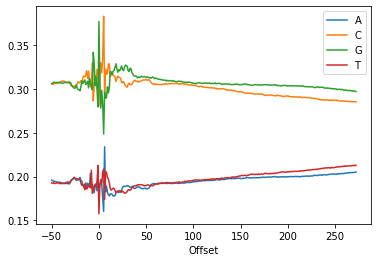

In [9]:
dat.iloc[:,:5].set_index("Offset").plot.line()
plt.show()

In [10]:
fdiry = FD_TAG
fname = "tagAutocorrelation.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head()

,Distance in bp(Fragment Length Estimate: 223)(Peak Width Estimate: 223),"Same Strand (+ for Watson strand, - for Crick)",Opposite Strand
0,-2000,14384.0,13630.0
1,-1999,14093.0,13521.0
2,-1998,14240.0,13653.0
3,-1997,14321.0,13585.0
4,-1996,14595.0,13696.0


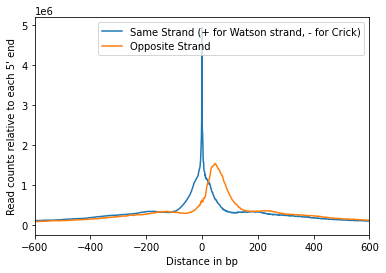

In [11]:
dat.set_index("Distance in bp(Fragment Length Estimate: 223)(Peak Width Estimate: 223)").plot.line()
plt.xlabel("Distance in bp")
plt.ylabel("Read counts relative to each 5' end")
plt.xlim(-600, 600)
plt.show()

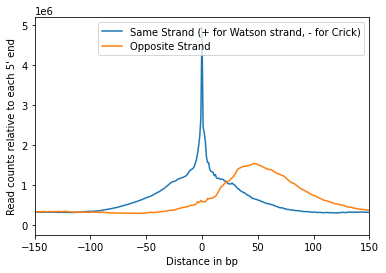

In [12]:
dat.set_index("Distance in bp(Fragment Length Estimate: 223)(Peak Width Estimate: 223)").plot.line()
plt.xlabel("Distance in bp")
plt.ylabel("Read counts relative to each 5' end")
plt.xlim(-150, 150)
plt.show()

-----
## HOMER makeTagDirectory of single sample (Option: maxlen 65)

In [41]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/log/maketag_t00_maxlen.txt \
    <<'EOF'
#!/bin/bash

### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_CAP=/data/reddylab/Kuei/Dex_ProCap
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads

### PRO-cap
FP_BAM_CAP_T00=$FD_CAP/new_files/A549_control_alignments/A549_untreated_merged.bam
FP_BAM_CAP_T15=$FD_CAP/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
FP_BAM_CAP_T60=$FD_CAP/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam

### make Tag dir for PRO-cap (control)
FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer
FD_TAG=$FD_OUT/tags/procap_t00_maxlen
FP_BAM=$FP_BAM_CAP_T00
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC -maxlen 65

EOF

Submitted batch job 24691150


### Quality Control Checks:

In [4]:
import numpy  as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
FD_TAG="/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer/tags/procap_t00_maxlen/"

#### Read clonality/PCR duplicates

In [7]:
fdiry = FD_TAG
fname = "tagCountDistribution.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head(3)

,"Tags per tag position (Median = 0, tags per genomic bp = 0.002)",Fraction of Positions
0,0,0.857530
1,1,0.114756
2,2,0.015106


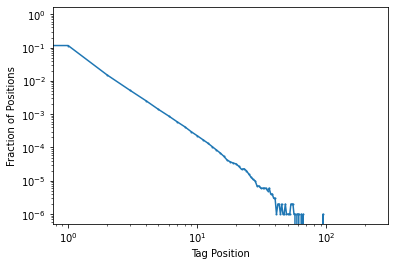

In [10]:
x=dat.loc[:, dat.columns.str.startswith('Tags per tag position')]
y=dat['Fraction of Positions']

plt.plot(x, y, '-o', markersize=1)
plt.xlabel("Tag Position")
plt.ylabel("Fraction of Positions")
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Read length distribution

In [11]:
fdiry = FD_TAG
fname = "tagLengthDistribution.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head(3)

,Tag Length (Average tag length = 39.173910),Fraction of Tags
0,0,0.0
1,1,0.0
2,2,0.0


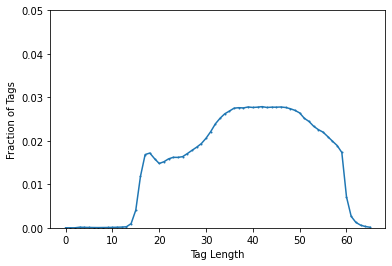

In [13]:
x=dat.loc[:, dat.columns.str.startswith('Tag Length')]
y=dat['Fraction of Tags']

plt.plot(x, y, '-o', markersize=1)
plt.xlabel("Tag Length")
plt.ylabel("Fraction of Tags")
plt.ylim(0, 0.05)
plt.show()

#### Nucleotide preferences near the 5' end of the read

In [14]:
fdiry = FD_TAG
fname = "tagFreqUniq.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head(3)

,Offset,A,C,G,T,A/T,C/G,A/G,C/T,AA,...,GA,GC,GG,GT,TA,TC,TG,TT,N,NN
0,-50,0.195517,0.306309,0.307169,0.191005,0.155278,0.383424,0.282875,0.277222,0.049888,...,0.057578,0.099545,0.106105,0.043942,0.026739,0.057591,0.059744,0.046931,8216937.0,8216932.0
1,-49,0.195189,0.306890,0.307778,0.190144,0.154816,0.384271,0.282808,0.276575,0.049275,...,0.057518,0.099660,0.106645,0.043956,0.026672,0.056908,0.059781,0.046783,8216935.0,8216931.0
2,-48,0.194421,0.305943,0.308844,0.190791,0.154572,0.384725,0.282785,0.276677,0.049341,...,0.057394,0.100218,0.106930,0.044303,0.026703,0.057552,0.059658,0.046878,8216937.0,8216933.0


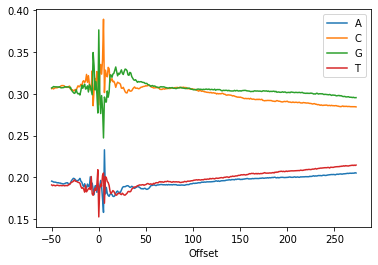

In [15]:
dat.iloc[:,:5].set_index("Offset").plot.line()
plt.show()

#### Distribution of reads relative to one another

In [16]:
fdiry = FD_TAG
fname = "tagAutocorrelation.txt"
fpath = os.path.join(fdiry, fname)

dat = pd.read_csv(fpath, sep="\t")
dat.head(3)

,Distance in bp(Fragment Length Estimate: 224)(Peak Width Estimate: 224),"Same Strand (+ for Watson strand, - for Crick)",Opposite Strand
0,-2000,11636.0,11299.0
1,-1999,11608.0,11571.0
2,-1998,11355.0,11922.0


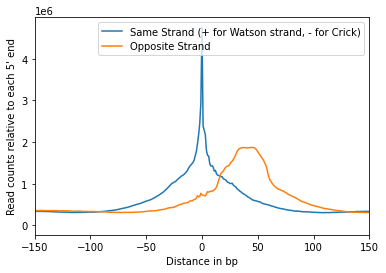

In [40]:
val = dat.columns.values.astype(str)
idx = np.char.startswith(val, "Distance")

dat.set_index(val[idx][0]).plot.line()
plt.xlabel("Distance in bp")
plt.ylabel("Read counts relative to each 5' end")
plt.xlim(-150, 150)
plt.show()

-----

## Run makeTagDirectory for all sample

```
### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_CAP=/data/reddylab/Kuei/Dex_ProCap
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads

### PRO-cap
FP_BAM_CAP_T00=$FD_CAP/new_files/A549_control_alignments/A549_untreated_merged.bam
FP_BAM_CAP_T15=$FD_CAP/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
FP_BAM_CAP_T60=$FD_CAP/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam

### make Tag dir for PRO-cap (control)
FD_OUT=/gpfs/fs1/data/reddylab/Kuei/Dex_ProCap/run_homer
FD_TAG=$FD_OUT/tags/procap_t00_hg38
FP_BAM=$FP_BAM_CAP_T00
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC
```

Creating Tag Directories

`makeTagDirectory <Output Directory Name> [options] <alignment file1> [alignment file 2] ...`

### PRO-cap (all samples)

In [1]:
ls /data/reddylab/Kuei/Dex_PROcap

new_files/  new_files.tar.gz  out_new_files/  run_homer/


In [2]:
ls -1 /data/reddylab/Kuei/Dex_PROcap/run_homer/tags

procap_t00/
procap_t00_maxlen/
procap_t15/
procap_t15_maxlen/
procap_t60/
procap_t60_maxlen/
rnaseq_t00/
rnaseq_t15/
rnaseq_t60/


In [3]:
ls -1 /data/reddylab/Kuei/Dex_PROcap/new_files/*/*bam

/data/reddylab/Kuei/Dex_PROcap/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
/data/reddylab/Kuei/Dex_PROcap/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged_with_dup.bam
/data/reddylab/Kuei/Dex_PROcap/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam
/data/reddylab/Kuei/Dex_PROcap/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged_with_dup.bam
/data/reddylab/Kuei/Dex_PROcap/new_files/A549_control_alignments/A549_untreated_merged.bam
/data/reddylab/Kuei/Dex_PROcap/new_files/A549_control_alignments/A549_untreated_merged_with_dup.bam


In [4]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_cap_all.txt \
    <<'EOF'
#!/bin/bash

### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_CAP=/data/reddylab/Kuei/Dex_PROcap
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads

### PRO-cap
FP_BAM_CAP_T00=$FD_CAP/new_files/A549_control_alignments/A549_untreated_merged.bam
FP_BAM_CAP_T15=$FD_CAP/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
FP_BAM_CAP_T60=$FD_CAP/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam

### make Tag dir for PRO-cap (control)
FD_OUT=$FD_CAP/run_homer
FD_TAG=$FD_OUT/tags/procap_t00
FP_BAM=$FP_BAM_CAP_T00
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC

### make Tag dir for PRO-cap (15m)
FD_OUT=$FD_CAP/run_homer
FD_TAG=$FD_OUT/tags/procap_t15
FP_BAM=$FP_BAM_CAP_T15
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC

### make Tag dir for PRO-cap (1hr)
FD_OUT=$FD_CAP/run_homer
FD_TAG=$FD_OUT/tags/procap_t60
FP_BAM=$FP_BAM_CAP_T60
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC

EOF

Submitted batch job 24719864


### PRO-cap (all samples; options: maxlen)

In [5]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_cap_all_maxlen.txt \
    <<'EOF'
#!/bin/bash

### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads
FD_CAP=/data/reddylab/Kuei/Dex_PROcap
FD_OUT=/data/reddylab/Kuei/Dex_PROcap/run_homer

### PRO-cap
FP_BAM_CAP_T00=$FD_CAP/new_files/A549_control_alignments/A549_untreated_merged.bam
FP_BAM_CAP_T15=$FD_CAP/new_files/A549_15min_Dexamethasone_alignments/A549_15min_Dexamethasone_merged.bam
FP_BAM_CAP_T60=$FD_CAP/new_files/A549_1hr_Dexamethasone_alignments/A549_1h_Dexamethasone_merged.bam

### make Tag dir for PRO-cap (control)
FD_TAG=$FD_OUT/tags/procap_t00_maxlen
FP_BAM=$FP_BAM_CAP_T00
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC -maxlen 65

### make Tag dir for PRO-cap (15m)
FD_TAG=$FD_OUT/tags/procap_t15_maxlen
FP_BAM=$FP_BAM_CAP_T15
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC -maxlen 65

### make Tag dir for PRO-cap (1hr)
FD_TAG=$FD_OUT/tags/procap_t60_maxlen
FP_BAM=$FP_BAM_CAP_T60
makeTagDirectory $FD_TAG/ $FP_BAM -genome hg38 -checkGC -maxlen 65

EOF

Submitted batch job 24719871


### RNA-seq (3 time points)

In [6]:
ls /data/reddylab/projects/GGR/data/rna_seq/mapped_reads

dex_depletion/               iter-1/                       iter_dex_depletion/
iter0/                       iter-1_cell_line_comparison/  iter_hCas9_puro/
iter0_cell_line_comparison/  iter-1_HDAC_inhibitors/       iter_over/
iter0_HDAC_inhibitors/       iter_dCas9_krab_puro/         iter_short/


In [7]:
!ls /data/reddylab/projects/GGR/data/rna_seq/mapped_reads/iter0/t00_rep?/

/data/reddylab/projects/GGR/data/rna_seq/mapped_reads/iter0/t00_rep1/:
STAR_1pass  STAR_2pass_featurecounts  STAR_2pass_rsem

/data/reddylab/projects/GGR/data/rna_seq/mapped_reads/iter0/t00_rep2/:
STAR_1pass  STAR_2pass_featurecounts  STAR_2pass_rsem

/data/reddylab/projects/GGR/data/rna_seq/mapped_reads/iter0/t00_rep3/:
STAR_1pass  STAR_2pass_featurecounts  STAR_2pass_rsem

/data/reddylab/projects/GGR/data/rna_seq/mapped_reads/iter0/t00_rep4/:
STAR_1pass  STAR_2pass_featurecounts  STAR_2pass_rsem


In [8]:
%%bash
module load perl
module load gcc
source /data/reddylab/software/miniconda2/bin/activate alex_dev
export PATH=/data/reddylab/software/homer/bin/:$PATH
sbatch -pnew,all \
    --mem 16G \
    -o /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_rna_all.txt \
    <<'EOF'
#!/bin/bash

### set directory
FP_GEN=/data/reddylab/Kuei/annotation/gencode.v34.annotation.gtf
FD_GGR=/data/reddylab/projects/GGR/
FD_RNA_ALIGN=$FD_GGR/data/rna_seq/mapped_reads
FD_CAP=/data/reddylab/Kuei/Dex_PROcap
FD_OUT=/data/reddylab/Kuei/Dex_PROcap/run_homer

### RNA-seq
FP_BAM_RNA_T00_short_rep1=$FD_RNA_ALIGN/iter_short/t00m_rep1.star2.Aligned.out.sorted.bam
FP_BAM_RNA_T00_short_rep2=$FD_RNA_ALIGN/iter_short/t00m_rep2.star2.Aligned.out.sorted.bam
FP_BAM_RNA_T00_short_rep3=$FD_RNA_ALIGN/iter_short/t00m_rep3.star2.Aligned.out.sorted.bam

FP_BAM_RNA_T00_long_rep1=$FD_RNA_ALIGN/iter0/t00_rep1/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T00_long_rep2=$FD_RNA_ALIGN/iter0/t00_rep2/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T00_long_rep3=$FD_RNA_ALIGN/iter0/t00_rep3/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T00_long_rep4=$FD_RNA_ALIGN/iter0/t00_rep4/STAR_2pass_featurecounts/Aligned.out.sorted.bam

FP_BAM_RNA_T15_short_rep1=$FD_RNA_ALIGN/iter_short/t15m_rep1.star2.Aligned.out.sorted.bam
FP_BAM_RNA_T15_short_rep2=$FD_RNA_ALIGN/iter_short/t15m_rep2.star2.Aligned.out.sorted.bam
FP_BAM_RNA_T15_short_rep3=$FD_RNA_ALIGN/iter_short/t15m_rep3.star2.Aligned.out.sorted.bam

FP_BAM_RNA_T60_long_rep1=$FD_RNA_ALIGN/iter0/t1_rep1/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T60_long_rep2=$FD_RNA_ALIGN/iter0/t1_rep2/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T60_long_rep3=$FD_RNA_ALIGN/iter0/t1_rep3/STAR_2pass_featurecounts/Aligned.out.sorted.bam
FP_BAM_RNA_T60_long_rep4=$FD_RNA_ALIGN/iter0/t1_rep4/STAR_2pass_featurecounts/Aligned.out.sorted.bam

### make Tag dir for RNA-seq (control)
FD_TAG=$FD_OUT/tags/rnaseq_t00
FP_BAM1=$FP_BAM_RNA_T00_short_rep1
FP_BAM2=$FP_BAM_RNA_T00_short_rep2
FP_BAM3=$FP_BAM_RNA_T00_short_rep3
makeTagDirectory $FD_TAG/ $FP_BAM1 $FP_BAM2 $FP_BAM3 -genome hg38 -checkGC

### make Tag dir for RNA-seq (15m)
FD_TAG=$FD_OUT/tags/rnaseq_t15
FP_BAM1=$FP_BAM_RNA_T15_short_rep1
FP_BAM2=$FP_BAM_RNA_T15_short_rep2
FP_BAM3=$FP_BAM_RNA_T15_short_rep3
makeTagDirectory $FD_TAG/ $FP_BAM1 $FP_BAM2 $FP_BAM3 -genome hg38 -checkGC

### make Tag dir for RNA-seq (1hr)
FD_TAG=$FD_OUT/tags/rnaseq_t60
FP_BAM1=$FP_BAM_RNA_T60_long_rep1
FP_BAM2=$FP_BAM_RNA_T60_long_rep2
FP_BAM3=$FP_BAM_RNA_T60_long_rep3
FP_BAM4=$FP_BAM_RNA_T60_long_rep4
makeTagDirectory $FD_TAG/ $FP_BAM1 $FP_BAM2 $FP_BAM3 $FP_BAM4 -genome hg38 -checkGC

EOF

Submitted batch job 24719877


-----

makeTagDirectory basically parses through the alignment file and splits the tags into separate files based on their chromosome.  As a result, several *.tags.tsv files are created in the output directory.  These are made to very efficiently return to the data during downstream analysis.  This also helps speed up the analysis of very large data sets without running out of memory.

In the end, your output directory will contain several *.tags.tsv files, as well as a file named "tagInfo.txt".  

This file contains information about your sequencing run, including the total number of tags considered.  This file is used by later programs to quickly reference information about the experiment, and can be manually modified to set certain parameters for analysis.

In [3]:
!head /data/reddylab/Kuei/Dex_PROcap/run_homer/tags/procap_t00/tagInfo.txt

name	Unique Positions	Total Tags
genome=hg38	13991522	9384553.0
fragmentLengthEstimate=223		
peakSizeEstimate=223		
tagsPerBP=0.002906		
averageTagsPerPosition=0.230		
medianTagsPerPosition=0		
averageTagLength=61.292		
gsizeEstimate=3229495724		
averageFragmentGCcontent=0.620		


In [2]:
!head /data/reddylab/Kuei/Dex_PROcap/run_homer/tags/procap_t00/chr1.tags.tsv

	chr1	13325	0	1.0	144
	chr1	13658	1	0.5	112
	chr1	13690	1	0.5	144
	chr1	16077	0	0.5	27
	chr1	16103	1	0.5	27
	chr1	16463	0	0.5	144
	chr1	16609	1	0.5	129
	chr1	17443	0	0.5	75
	chr1	17462	0	0.5	39
	chr1	17500	1	0.5	39


-----

## Check output message

In [1]:
ls -1 /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/tags

procap_t00/
procap_t00_maxlen/
procap_t15/
procap_t15_maxlen/
procap_t60/
procap_t60_maxlen/
rnaseq_t00/
rnaseq_t15/
rnaseq_t60/


In [2]:
cat /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_cap_all.txt | grep Avg

	Avg Fragment GC% = 61.96%
	Avg Expected GC% = 40.60%
	Avg Fragment GC% = 60.89%
	Avg Expected GC% = 40.60%
	Avg Fragment GC% = 59.90%
	Avg Expected GC% = 40.63%


In [3]:
cat /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_cap_all_maxlen.txt | grep Avg

	Avg Fragment GC% = 62.16%
	Avg Expected GC% = 40.61%
	Avg Fragment GC% = 61.30%
	Avg Expected GC% = 40.61%
	Avg Fragment GC% = 60.71%
	Avg Expected GC% = 40.63%


In [4]:
cat /gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/log/maketag_rna_all.txt | grep Avg

## Quality Control Checks

In [5]:
import numpy  as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
FD_OUT="/gpfs/fs1/data/reddylab/Kuei/Dex_PROcap/run_homer/tags"
os.listdir(FD_OUT)

['procap_t00',
 'procap_t60_maxlen',
 'procap_t15',
 'procap_t15_maxlen',
 'procap_t60',
 'procap_t00_maxlen',
 'rnaseq_t00',
 'rnaseq_t15',
 'rnaseq_t60']

In [13]:
FDIRYS_PROCAP = [
    'procap_t00',
    'procap_t15',
    'procap_t60']

FDIRYS_PROCAP_MAXLEN = [
    'procap_t00_maxlen',
    'procap_t15_maxlen',
    'procap_t60_maxlen']

FDIRYS_RNASEQ = [
    'rnaseq_t00',
    'rnaseq_t15',
    'rnaseq_t60']

FDIRYS = np.r_[FDIRYS_PROCAP, FDIRYS_PROCAP_MAXLEN, FDIRYS_RNASEQ]

### Read clonality/PCR duplicates

In [8]:
### set file and column names
cname = ["Tags per tag position", "Fraction of Positions"]
fname = "tagCountDistribution.txt"

### read in the results (procap)
lst = []
for fdiry in FDIRYS_PROCAP:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_procap = pd.concat(lst)

### read in the results (procap maxlen)
lst = []
for fdiry in FDIRYS_PROCAP_MAXLEN:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_procap_maxlen = pd.concat(lst)

### read in the results (rnaseq)
lst = []
for fdiry in FDIRYS_RNASEQ:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_rnaseq = pd.concat(lst)
    
###
display(dat_merge_procap.head(3))
display(dat_merge_procap_maxlen.head(3))
display(dat_merge_rnaseq.head(3))

,Tags per tag position,Fraction of Positions,sample
0,0,0.845399,procap_t00
1,1,0.125846,procap_t00
2,2,0.016180,procap_t00


,Tags per tag position,Fraction of Positions,sample
0,0,0.857530,procap_t00_maxlen
1,1,0.114756,procap_t00_maxlen
2,2,0.015106,procap_t00_maxlen


,Tags per tag position,Fraction of Positions,sample
0,0,0.601156,rnaseq_t00
1,1,0.205465,rnaseq_t00
2,2,0.065564,rnaseq_t00


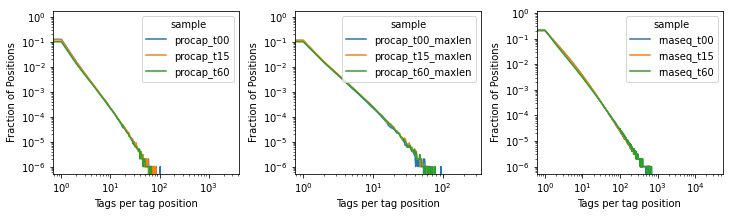

In [9]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

ax = axes[0]
sns.lineplot(data=dat_merge_procap, ax=ax, x=cname[0], y=cname[1], hue="sample")
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[1]
sns.lineplot(data=dat_merge_procap_maxlen, ax=ax, x=cname[0], y=cname[1], hue="sample")
ax.set_xscale('log')
ax.set_yscale('log')

ax = axes[2]
sns.lineplot(data=dat_merge_rnaseq, ax=ax, x=cname[0], y=cname[1], hue="sample")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [11]:
### 
cname = ["Tags per tag position", "Fraction of Positions"]
fname = "tagCountDistribution.txt"

###
lst = []
for fdiry in FDIRYS:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge = pd.concat(lst)

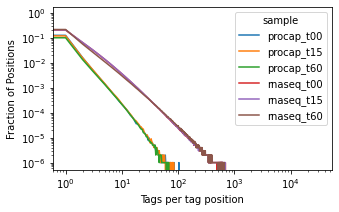

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(
    data = dat_merge,
    ax   = ax,
    x    = "Tags per tag position", 
    y    = "Fraction of Positions", 
    hue  = "sample")
plt.xscale('log')
plt.yscale('log')
plt.show()

### Read length distribution

In [10]:
### 
cname = ["Tag Length", "Fraction of Tags"]
fname = "tagLengthDistribution.txt"

### read in the results (procap)
lst = []
for fdiry in FDIRYS_PROCAP:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_procap = pd.concat(lst)

### read in the results (procap maxlen)
lst = []
for fdiry in FDIRYS_PROCAP_MAXLEN:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_procap_maxlen = pd.concat(lst)

### read in the results (rnaseq)
lst = []
for fdiry in FDIRYS_RNASEQ:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t", header=0, names=cname)
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)
dat_merge_rnaseq = pd.concat(lst)
    
###
display(dat_merge_procap.head(3))
display(dat_merge_procap_maxlen.head(3))
display(dat_merge_rnaseq.head(3))

,Tag Length,Fraction of Tags,sample
0,0,0.0,procap_t00
1,1,0.0,procap_t00
2,2,0.0,procap_t00


,Tag Length,Fraction of Tags,sample
0,0,0.0,procap_t00_maxlen
1,1,0.0,procap_t00_maxlen
2,2,0.0,procap_t00_maxlen


,Tag Length,Fraction of Tags,sample
0,0,0.0,rnaseq_t00
1,1,0.0,rnaseq_t00
2,2,0.0,rnaseq_t00


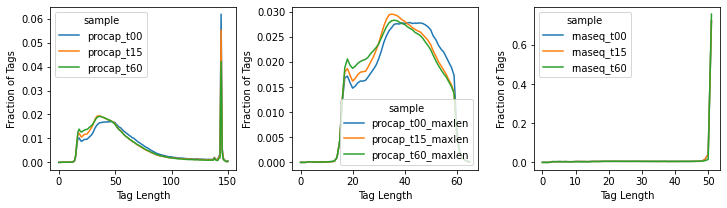

In [12]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sns.lineplot(data=dat_merge_procap,        ax=axes[0], x=cname[0], y=cname[1], hue="sample")
sns.lineplot(data=dat_merge_procap_maxlen, ax=axes[1], x=cname[0], y=cname[1], hue="sample")
sns.lineplot(data=dat_merge_rnaseq,        ax=axes[2], x=cname[0], y=cname[1], hue="sample")
plt.show()

According to the document, most csRNA-seq reads are between 20-55 nt in length. In the PRO-cap data I have, most reads are around 140bp

### Nucleotide preferences

In [14]:
fname = "tagFreqUniq.txt"
lst = []
for fdiry in FDIRYS:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t")
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)

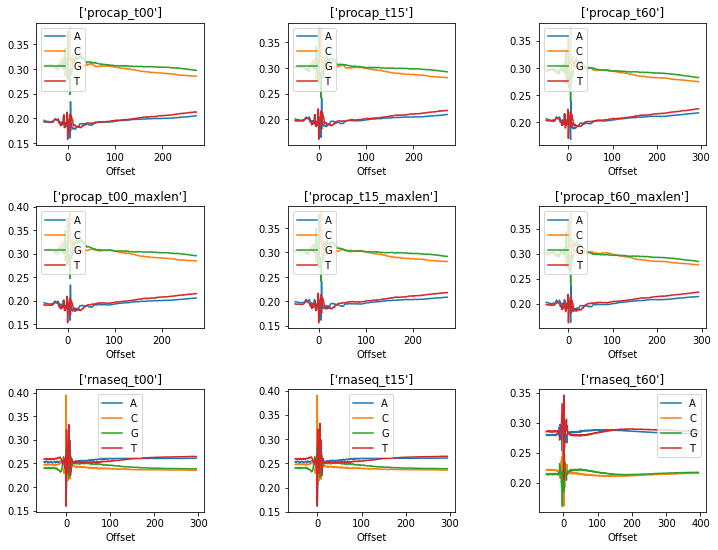

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()
for ax, dat in zip(axes, lst):
    dat.iloc[:,:5].set_index("Offset").plot.line(ax=ax)
    ax.set_title(np.unique(dat['sample']))
plt.show()

According to the document:  `Most csRNA-seq data should have a strong preference for Initiator-like sequences near the 5' end (usually C-1A0). Most species also show evidence for a TATA box at approx. -30 bp (e.g. spike in A/T content)`

### Distribution of reads relative to one another

In [16]:
fname = "tagAutocorrelation.txt"
lst = []
for fdiry in FDIRYS:
    fpath = os.path.join(FD_OUT, fdiry, fname)
    dat   = pd.read_csv(fpath, sep="\t")
    dat   = dat.assign(sample=lambda x: fdiry)
    lst.append(dat)

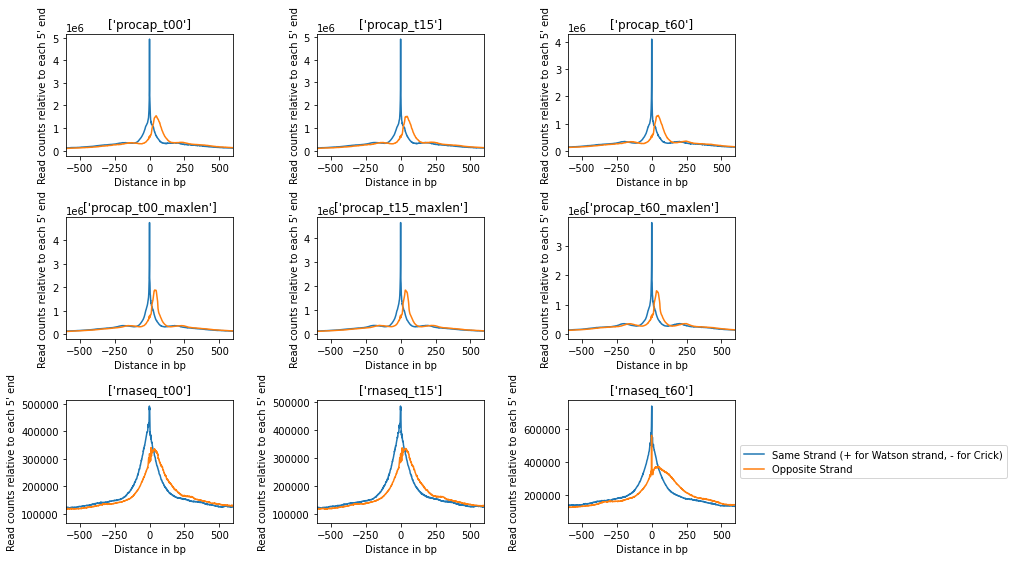

In [18]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()
for ax, dat in zip(axes, lst):
    dat.set_index(dat.columns[0]).plot.line(ax=ax, legend=False)
    ax.set_xlabel("Distance in bp")
    ax.set_ylabel("Read counts relative to each 5' end")
    ax.set_xlim(-600, 600)
    ax.set_title(np.unique(dat['sample']))
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))    
plt.show()

According to the document: `In the case of transcription initiation data, reads from TSS will typically cluster on the same strand within 50-100nt from each other. Due to the [normally] bidirectional nature of transcription from regulatory elements, reads will also typically appear upstream of TSS on the opposite strand (i.e. bidirectional transcription).`

Below I have zoomed in further to check if the peak of the opposite strand of PRO-cap is within 50-100nt.

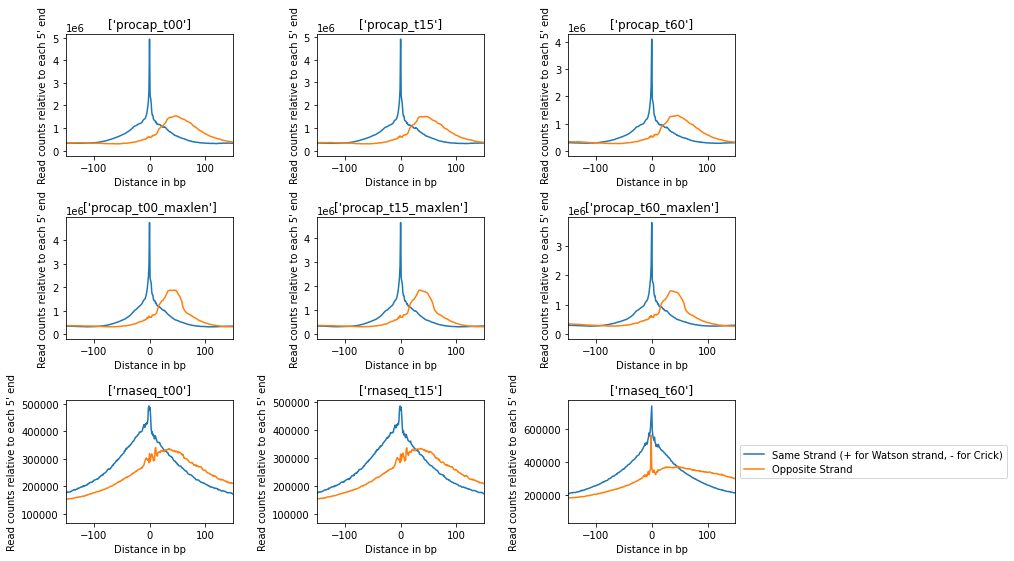

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 9))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()
for ax, dat in zip(axes, lst):
    dat.set_index(dat.columns[0]).plot.line(ax=ax, legend=False)
    ax.set_xlabel("Distance in bp")
    ax.set_ylabel("Read counts relative to each 5' end")
    ax.set_xlim(-150, 150)
    ax.set_title(np.unique(dat['sample']))
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))    
plt.show()